# Heatmap of Cooperation rate by various payoff structures.

In [1]:
using CSV
using DataFrames
using Dates
using Glob
using Plots
using StatsBase: mean

In [2]:
function csv_to_df(dir_name_vec::Vector{String})::Vector{DataFrame}
    csv_file_names = []

    for dir_name in dir_name_vec
        append!(csv_file_names, glob("*.csv", "../output/$(dir_name)"))
    end

    return [CSV.File(csv_file_name) |> DataFrame for csv_file_name in csv_file_names]
end

calc_cooperation_rate_mean(df::DataFrame)::DataFrame = combine(groupby(df, 1:15), :cooperation_rate => mean => :cooperation_rate)

make_mean_df(df_vec::Vector{DataFrame})::DataFrame = vcat([calc_cooperation_rate_mean(df) for df in df_vec]...)

function get_value(
    df::AbstractDataFrame,
    x::Float64,
    y::Float64,
    x_symbol::Symbol,
    y_symbol::Symbol,
    value_symbol::Symbol,
)::Union{Float64,Missing}
    values = df[df[:, x_symbol] .== x .&& df[:, y_symbol] .== y, value_symbol]
    if length(values) > 0
        mean(values)
    else
        missing
    end
end

COLOR_MAP = cgrad([
    # RGB(0xC1/255, 0x20/255, 0x4D/255),  # red   #C1204D
    # RGB(0xFF/255, 0xFF/255, 0xFF/255),  # white #FFFFFF
    # RGB(0x41/255, 0x5E/255, 0xA6/255)   # blue  #415EA6
    RGB(0xC7/255, 0x24/255, 0x3A/255),  # red   #C7243A
    RGB(0xFF/255, 0xFF/255, 0xFF/255),  # white #FFFFFF
    RGB(0x32/255, 0x61/255, 0xAB/255)   # blue  #3261AB
])

function plot_cooperation_heatmap(df::AbstractDataFrame)::Plots.Plot
    T = sort(unique(df.initial_T))
    S = sort(unique(df.S))

    mat = reshape([get_value(df, t, s, :initial_T, :S, :cooperation_rate) for s in S, t in T], length(S), length(T))
    
    p = heatmap(
        T,
        S,
        mat,
        xlabel = "T",
        ylabel = "S",
        xlims = (-0.05, 2.05),
        ylims = (-1.05, 1.05),
        color = COLOR_MAP,
    )
    plot!([-0.05, 2.05], [0, 0], color = :gray, lw = 2, legend = false)
    plot!([1, 1], [-1.05, 1.05], color = :gray, lw = 2, legend = false)
    plot!([2.05, 2.05], [-1.05, 1.05], color = :black, lw = 0.5, legend = false)
    plot!([-0.05, 2.05], [1.05, 1.05], color = :black, lw = 0.5, legend = false)

    return p
end;

nrow(df) = 441
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.1, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0, generations = 10000, variability_mode = POPULATION

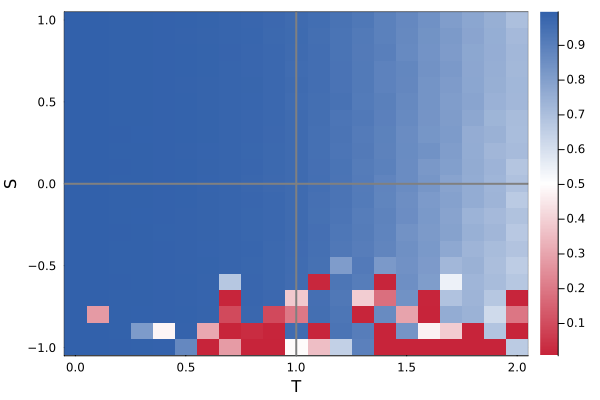

nrow(df) = 4410
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.1, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0, generations = 4000, variability_mode = POPULATION

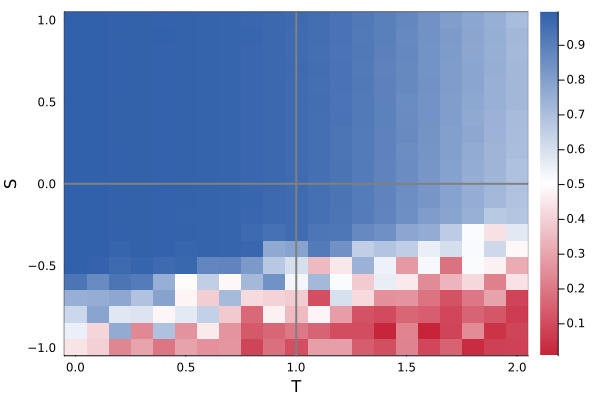

nrow(df) = 539
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0, generations = 5000, variability_mode = POPULATION

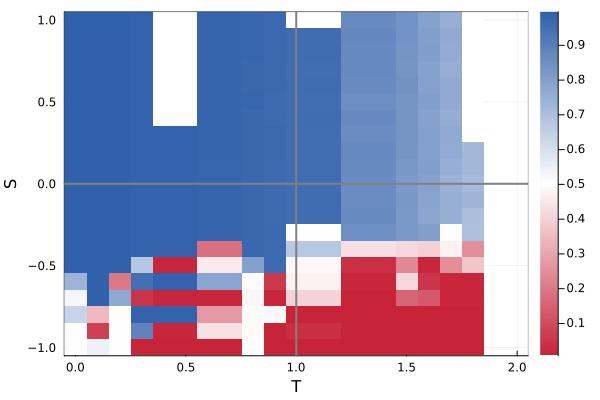

nrow(df) = 535
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.1, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0, generations = 5000, variability_mode = POPULATION

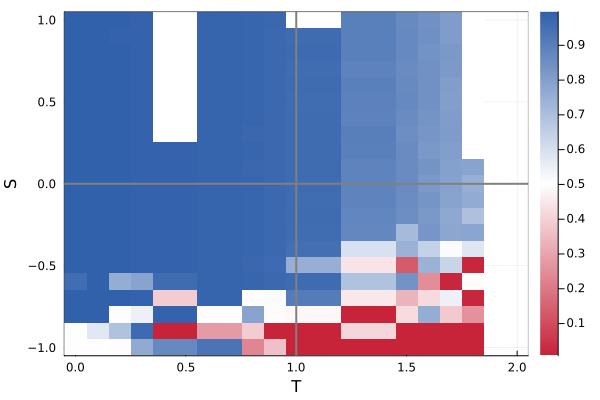

nrow(df) = 445
initial_N = 1000, initial_k = 200, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0, generations = 5000, variability_mode = POPULATION

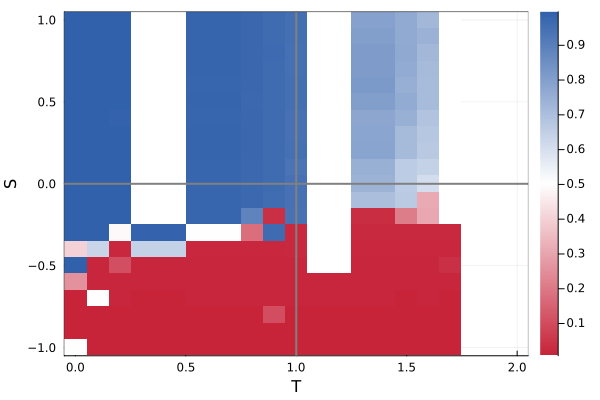

nrow(df) = 443
initial_N = 1000, initial_k = 200, initial_w = 0.5, Δw = 0.1, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0, generations = 5000, variability_mode = POPULATION

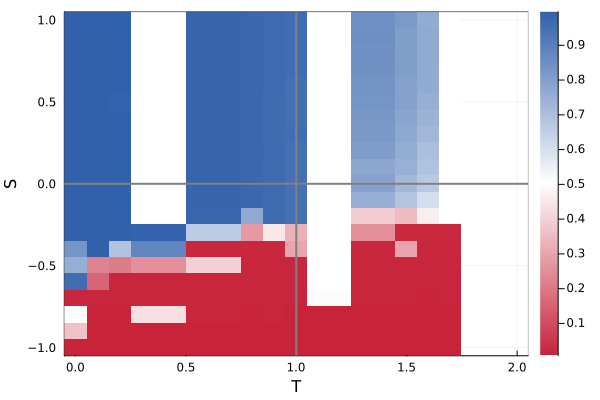

In [3]:
df_vec = csv_to_df(["20240110_215914", "20240110_220810", "20240111_080001"])
mean_df = make_mean_df(df_vec)
for df in groupby(mean_df, names(mean_df)[[1:2; 5:15]])
    @show nrow(df)
    title = join(["$(k) = $(v)" for (k, v) in pairs(df[1, [1:2; 5:15]])], ", ")
    print(title)
    p = plot_cooperation_heatmap(df)
    display(p)
end

nrow(df) = 5386
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.1, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0

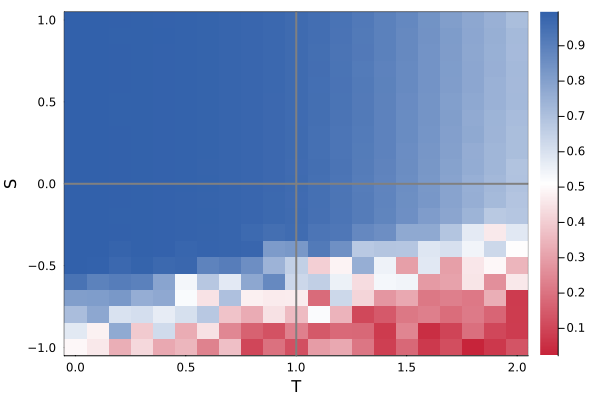

nrow(df) = 539
initial_N = 1000, initial_k = 100, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0

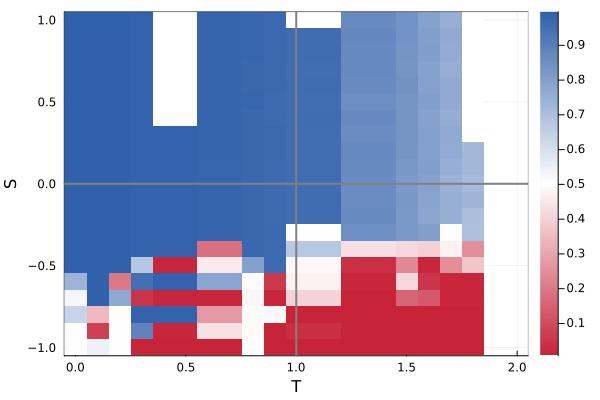

nrow(df) = 445
initial_N = 1000, initial_k = 200, initial_w = 0.5, Δw = 0.05, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0

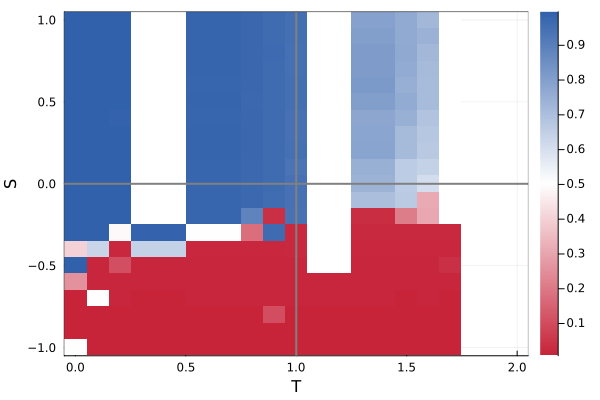

nrow(df) = 443
initial_N = 1000, initial_k = 200, initial_w = 0.5, Δw = 0.1, interaction_freqency = 1.0, reproduction_rate = 0.05, δ = 1.0, initial_μ_s = 0.01, initial_μ_c = 0.01, β = 0.0, sigma = 0.0

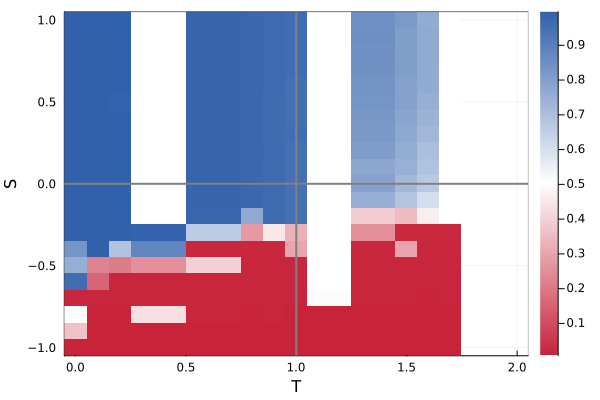

In [4]:
for df in groupby(mean_df, names(mean_df)[[1:2; 5:13]])
    @show nrow(df)
    title = join(["$(k) = $(v)" for (k, v) in pairs(df[1, [1:2; 5:13]])], ", ")
    print(title)
    p = plot_cooperation_heatmap(df)
    display(p)
end